Import Libraries

In [6]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version :",tf.__version__)

Tensorflow version : 2.16.1


Load and Preprocess Data

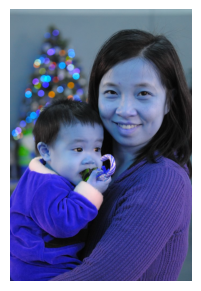

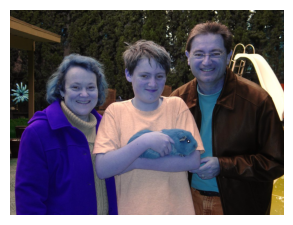

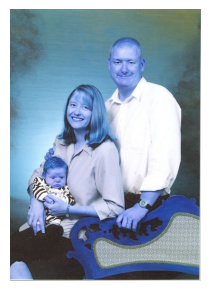

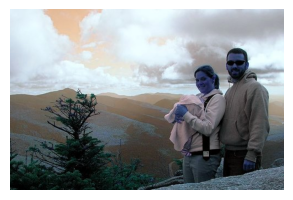

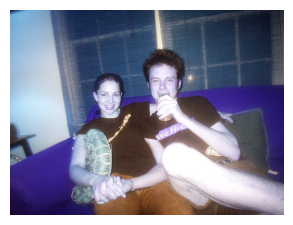

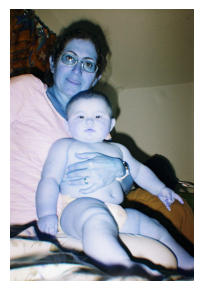

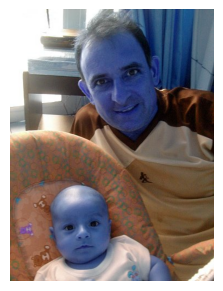

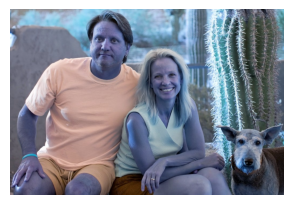

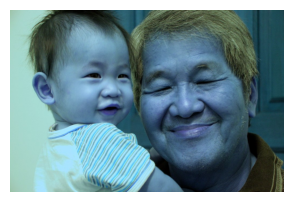

In [7]:
images = glob("C:/Users/harsh/Desktop/Task_2_1/Fam2a/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis("off")

In [8]:
train_datagen = ImageDataGenerator(rescale=0.2, validation_split=0.2)

gender_train_generator = train_datagen.flow_from_directory(
    'C:/Users/harsh/Desktop/Task_2_1/Fam2a',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

gender_validation_generator = train_datagen.flow_from_directory(
    'C:/Users/harsh/Desktop/Task_2_1/Fam2a',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

age_train_generator = train_datagen.flow_from_directory(
    'C:/Users/harsh/Desktop/Task_2_1/Fam2a',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

age_validation_generator = train_datagen.flow_from_directory(
    'C:/Users/harsh/Desktop/Task_2_1/Fam2a',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 604 images belonging to 1 classes.
Found 150 images belonging to 1 classes.
Found 604 images belonging to 1 classes.
Found 150 images belonging to 1 classes.


 Build the Gender Prediction Model

In [9]:
gender_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

gender_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gender_model.summary()


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the Gender Prediction Model

In [10]:
age_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

age_model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
age_model.summary()


Epoch 1/10


c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9209 - loss: 0.9943 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 1.000

Build the Age Prediction Model

In [11]:
age_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

age_model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
age_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the Age Prediction Model

In [12]:
history=age_model.fit(
    age_train_generator,
    epochs=10,
    validation_data=age_validation_generator
)
age_model.save('age_model.h5')


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 137.2018 - mae: 7.4381 - val_loss: 0.0133 - val_mae: 0.0922
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0197 - mae: 0.0999 - val_loss: 0.0038 - val_mae: 0.0396
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0056 - mae: 0.0499 - val_loss: 0.0014 - val_mae: 0.0197
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0020 - mae: 0.0275 - val_loss: 9.7192e-04 - val_mae: 0.0159
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0012 - mae: 0.0212 - val_loss: 7.1397e-04 - val_mae: 0.0135
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0011 - mae: 0.0183 - val_loss: 6.0989e-04 - val_mae: 0.0122
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 5.8644e-04 - mae: 0.0139 - val_loss: 5.7000e-04 - val_mae: 0.0115
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 8.8225e-04 - mae: 0.0148 - val_loss: 4.9064e-04 - val_mae: 0.0104
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━